In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('Housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


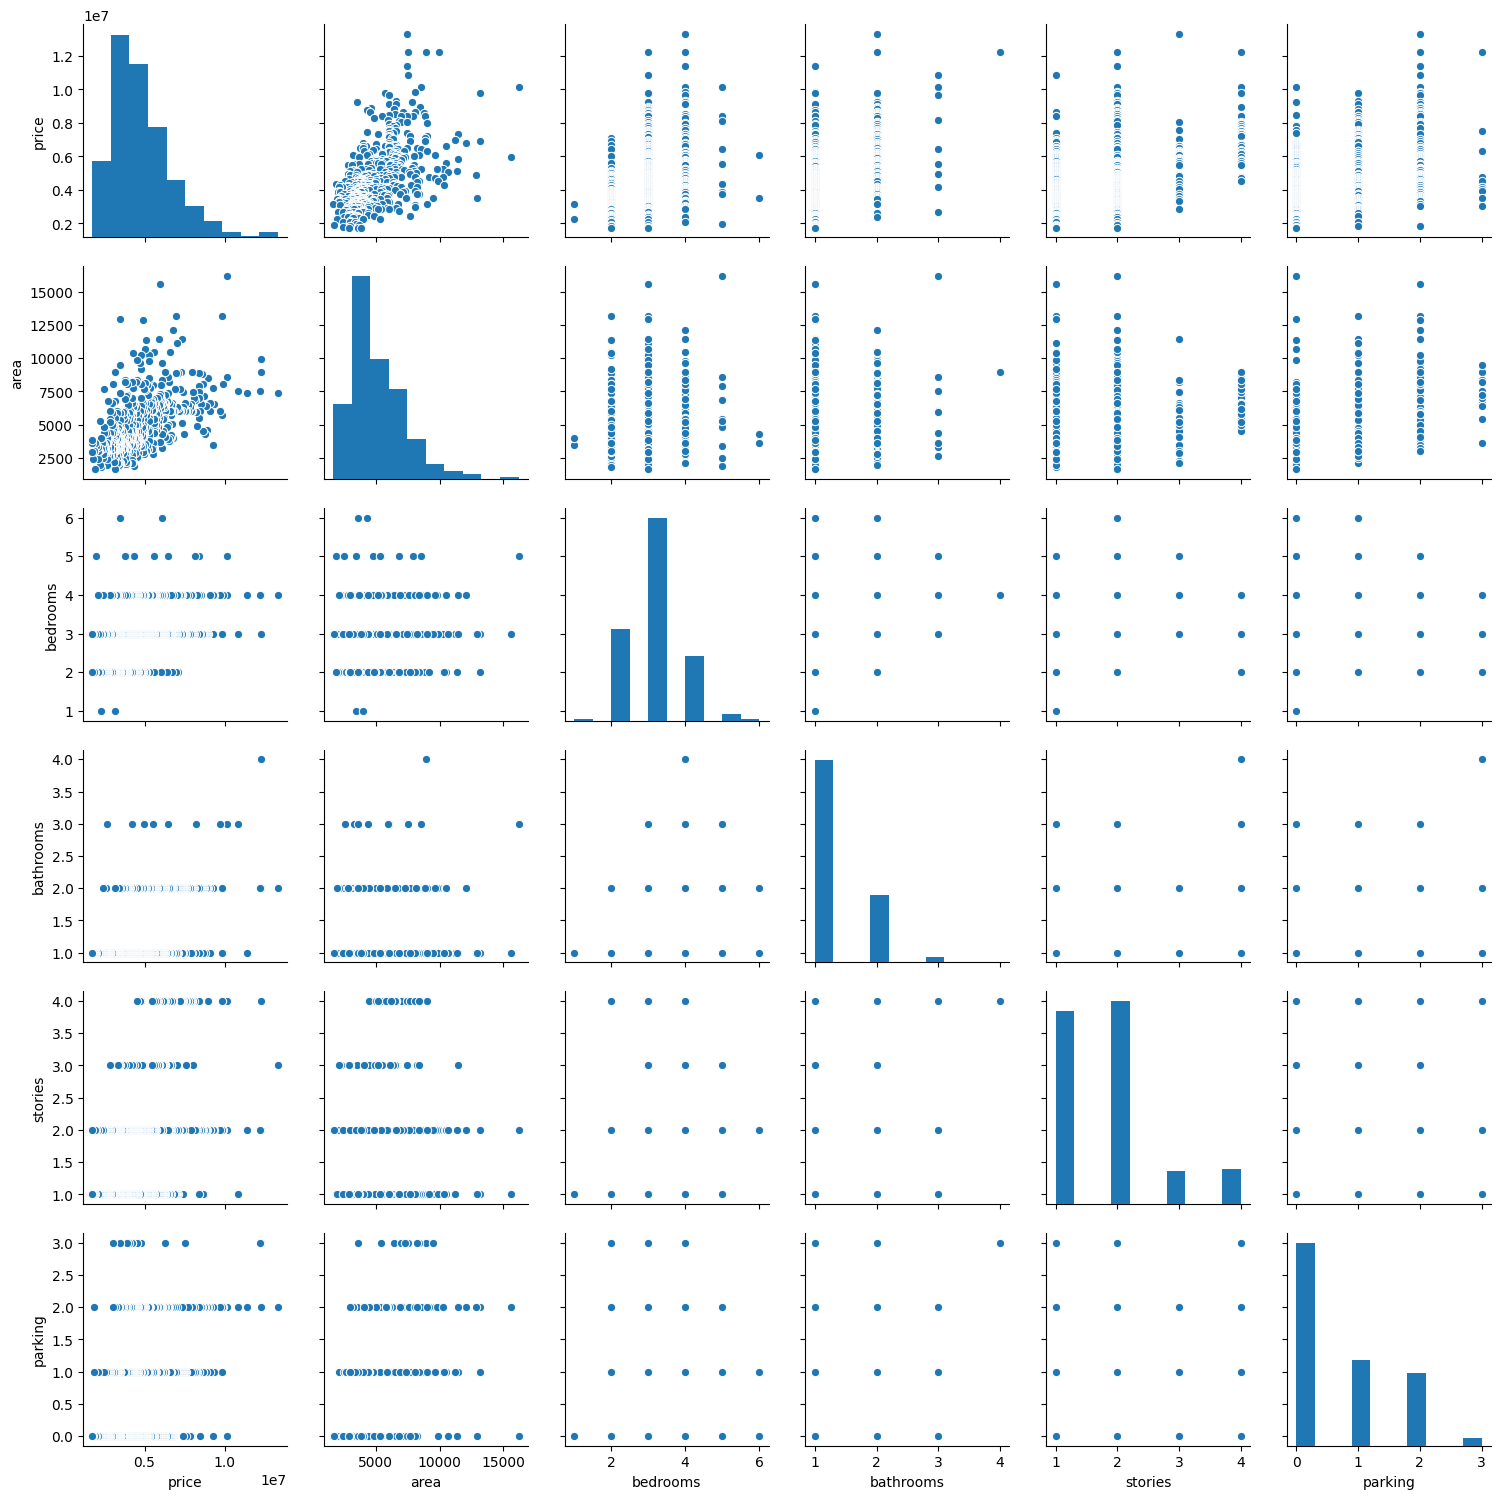

In [4]:
sns.pairplot(data)

In [5]:
data = pd.get_dummies(data, columns=['mainroad', 'guestroom', 'basement', 
                                     'hotwaterheating', 'airconditioning', 'prefarea'])
data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,furnished,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,semi-furnished,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,furnished,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,furnished,0,1,0,1,0,1,1,0,0,1,1,0


In [6]:
data[['mainroad_no', 'mainroad_yes', 'guestroom_no',
       'guestroom_yes', 'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes']] = data[['mainroad_no', 'mainroad_yes', 'guestroom_no',
       'guestroom_yes', 'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes']].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                545 non-null    int64 
 1   area                 545 non-null    int64 
 2   bedrooms             545 non-null    int64 
 3   bathrooms            545 non-null    int64 
 4   stories              545 non-null    int64 
 5   parking              545 non-null    int64 
 6   furnishingstatus     545 non-null    object
 7   mainroad_no          545 non-null    int64 
 8   mainroad_yes         545 non-null    int64 
 9   guestroom_no         545 non-null    int64 
 10  guestroom_yes        545 non-null    int64 
 11  basement_no          545 non-null    int64 
 12  basement_yes         545 non-null    int64 
 13  hotwaterheating_no   545 non-null    int64 
 14  hotwaterheating_yes  545 non-null    int64 
 15  airconditioning_no   545 non-null    int64 
 16  aircondi

In [7]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'furnishingstatus', 'mainroad_no', 'mainroad_yes', 'guestroom_no',
       'guestroom_yes', 'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes'],
      dtype='object')

In [8]:
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_no', 'mainroad_yes', 'guestroom_no',
       'guestroom_yes', 'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes']]
Y = data['price']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35)
print(len(x_train), len(x_test), len(y_train), len(y_test))

354 191 354 191


In [10]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [11]:
pd.DataFrame(lr.coef_, X.columns, columns = ['Coeff'])

,Coeff
area,2.689409e+02
bedrooms,5.144551e+04
bathrooms,1.129359e+06
stories,4.255084e+05
parking,2.983353e+05
mainroad_no,-1.594362e+05
mainroad_yes,1.594362e+05
guestroom_no,-2.183211e+05
guestroom_yes,2.183211e+05
basement_no,-1.231025e+05


In [12]:
pred = lr.predict(x_test)

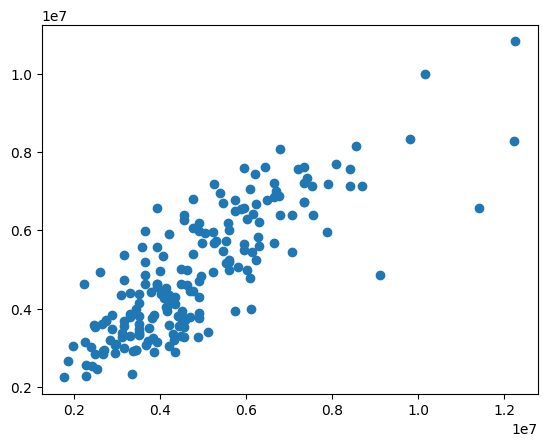

In [13]:
plt.scatter(y_test, pred)

(array([ 8., 17., 42., 61., 42., 16.,  2.,  0.,  1.,  2.]),
 array([-2656693.10969496, -1906131.43476404, -1155569.75983312,
         -405008.0849022 ,   345553.59002872,  1096115.26495964,
         1846676.93989056,  2597238.61482148,  3347800.2897524 ,
         4098361.96468332,  4848923.63961424]),
 <BarContainer object of 10 artists>)

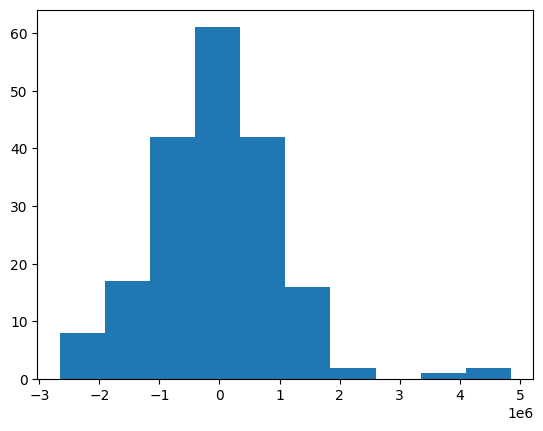

In [14]:
plt.hist(y_test - pred)

In [15]:
print("MAE:", metrics.mean_absolute_error(y_test, pred))
print("MSE:", metrics.mean_squared_error(y_test, pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("Score", lr.score(x_test, y_test))

MAE: 800738.6438546078
MSE: 1168435716505.681
RMSE 1080942.050484521
Score 0.6661658083992009
